In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

An example for exact finite method for stability and accuracy
\begin{align*}
\frac{du}{dt} = -a u_{k}, u(0) = u_{0}
\end{align*}
with solution $u(t_0) = u_0e^{-a t}$

The standard finite difference scheme for this ODE is given as
\begin{align*}
u_{k+1} = u_k -a h u_{k}
\end{align*}

The non-standard finite difference scheme for the ODE
\begin{align*}
u_{k+1} = u_k -a \phi u_{k}, \qquad \phi = \frac{(1 -e^{-a h} )}{a}
\end{align*}

let a = 4, u_{0} = 20.0 ,  t = 30 days, h= 0.05

'standard ($|u(t,0)- u_{k+1}|$)','non-standard ($|u(t,0)- u_{k+1}|$)'

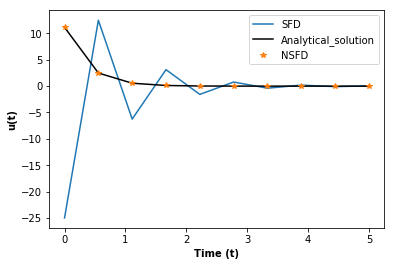

In [2]:
t = np.linspace(0,5,10)
h = 0.5
#u, r = np.zeros_like(t), np.zeros_like(t)
u = 50
r = 50
E = 50
listsE = []
listu= []
listsr = []
a = 3
ϕ = (1- np.exp(-a*h))/a
for j in t:
    E = E*np.exp(-a*h)
    u = u - a*h*u
    r = r - a*ϕ*r
    listsE.append(float(E))
    listu.append(float(u))
    listsr.append(float(r))
fig = plt.figure()
#plt.figure(2, figsize=(6,3))
plt.plot(t, listu,'-', t,  listsE ,'black', t,  listsr, '*')
plt.legend(['SFD','Analytical_solution','NSFD' ])
plt.xlabel("Time (t)", fontweight = 'bold')
#plt.ylim(-30, 30)
plt.ylabel('u(t)', fontweight = 'bold')
fig.savefig('ex1.png')

In [4]:
STD , NSTD = abs(np.array(listsE)-np.array(listu)), abs(np.array(listsE)-np.array(listsr))
STD, NSTD

(array([36.15650801, 10.01064658,  6.80544983,  3.00106239,  1.59015422,
         0.77507951,  0.39200182,  0.19500529,  0.0977248 ,  0.04881283]),
 array([1.77635684e-15, 1.77635684e-15, 5.55111512e-16, 1.66533454e-16,
        4.85722573e-17, 1.21430643e-17, 3.68628739e-18, 9.75781955e-19,
        2.57498016e-19, 6.43745040e-20]))

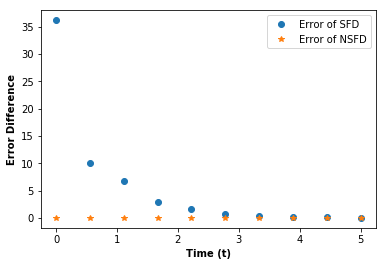

In [6]:
fig = plt.figure()
#plt.figure(2, figsize=(6,3)).
plt.plot(t, STD,'o', t, NSTD,'*')
plt.legend(['Error of SFD','Error of NSFD' ])
plt.xlabel("Time (t)", fontweight = 'bold')
#plt.ylim(-1, 30 ).
plt.ylabel('Error Difference', fontweight = 'bold')
fig.savefig('ex2.png')

<span style='color:blue'> $ \textbf{SIR model}\quad \left( f(S,I)=SI \right)$</span>

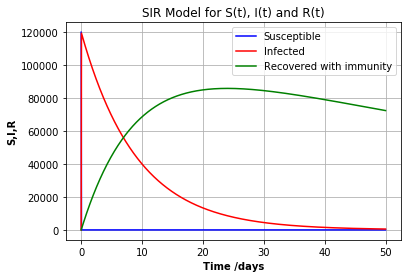

([0.0022037596886977854, 120000.0],
 [20.0, 119406.84057354469],
 [0.0, 85907.5087808078])

In [7]:
def deriv(y, t):       # The SIR model differential equations.
    S,I,R = y
    β, γ, λ, μ = 0.019, 1/10, 5.0, 0.01  
    dSdt = λ - μ*S - β*S*I
    dIdt = β*S*I - (γ + μ)*I
    dRdt = γ*I - μ*R
    return dSdt, dIdt, dRdt
y0 = [120000.0, 20.0, 0.0]
t = np.linspace(0, 50, 1000 )  
sol = odeint(deriv, y0, t)   # Integrate the SIR equations over the time grid, t.

plt.plot(t, sol[:,0],'b',t, sol[:,1],'r-',t, sol[:,2], 'g' )    # reduced y-values into same scale: where k/(10^10)
plt.legend(['Susceptible','Infected','Recovered with immunity' ])
plt.xlabel('Time /days',fontweight = 'bold')
plt.ylabel('S,I,R',fontweight = 'bold')
plt.grid(True)
plt.title("SIR Model for S(t), I(t) and R(t)")
plt.show()
[min(sol[:,0]), max(sol[:,0])], [min(sol[:,1]), max(sol[:,1])],[min(sol[:,2]), max(sol[:,2])]

<span style='color:blue'> $ \textbf{NSFD Method for standard SIR}$</span>

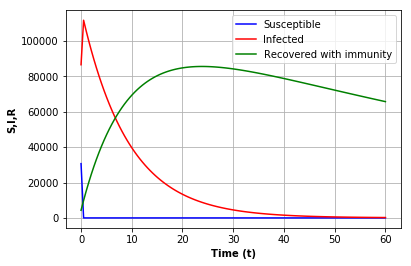

In [8]:
T = 60                                         
β, γ, λ, μ = 0.29, 1/10, 5.0, 0.01             #parameter: Contact rate, beta, and mean recovery rate, gamma, (in 1/days) same values as used for SIR model.
listE = []
listsu= []
listr = []
h = 0.5
ϕ = (np.exp(μ*h)-1)/μ
ϕ2 = (np.exp((μ+γ)*h)-1)/(μ+γ)
N = int(round(T/h))
t = np.linspace(0, T, N)   
S, u = 120000.0, np.sqrt(120000.0)      # Everyone else, S0, is susceptible to infection initially.
I, R = 20.0, 0.0                # Initial number of infected and recovered individuals, I0 and R0.
for j in range(N):
    #u[j+1] = (1/(2*(1+μ*ϕ)))*((-ϕ*β*np.sqrt(I[j])) + np.sqrt((ϕ**2)*(β**2)*I[j]+4*(1 +μ*ϕ)*(λ*ϕ+ S[j])))
    S = (1/(1 + ϕ*μ + ϕ*β*I))*(λ*ϕ + S)
    I = (1/(1 +(γ+μ)*ϕ2))*(I+β*ϕ2*I*S)
    R = (1/(1 +μ*ϕ))*(R + (γ*ϕ)*I)
    listE.append(float(S))
    listsu.append(float(I))
    listr.append(float(R))
plt.plot(t, listE,'blue', t, listsu, 'red', t, listr, 'g')
plt.xlabel("Time (t)", fontweight = 'bold')
plt.ylabel('S,I,R', fontweight = 'bold')
plt.grid(True)
plt.legend(['Susceptible','Infected','Recovered with immunity' ])
#[min(listS), max(listS)], [min(listI), max(listI)],[min(listR), max(listR)]

<span style='color:blue'> $ \textbf{SIR model}\quad \left( f(S,I)=\sqrt{SI} \right)$</span>

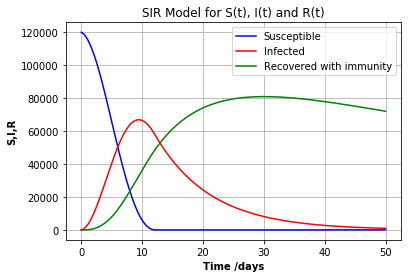

([0.005166455443045751, 120000.0],
 [20.0, 66886.24612510536],
 [0.0, 80918.37832331703])

In [7]:
def deriv(y, t):                # The SIR model differential equations.
    S,I,R = y
    β, γ, λ, μ = 0.29, 1/10, 5.0, 0.01 
    dSdt = λ - μ*S - β*(np.sqrt(S*I))
    dIdt = β*(np.sqrt(S*I)) - (γ + μ)*I
    dRdt = γ*I - μ*R
    return dSdt, dIdt, dRdt

y0 = [120000.0, 20.0, 0.0]
t = np.linspace(0, 50, 1000 )   
sol = odeint(deriv, y0, t)   # Integrate the SIR equations over the time grid, t.

plt.plot(t, sol[:,0],'b',t, sol[:,1],'r-',t, sol[:,2], 'g' )   # reduced y-values into same scale: where k/(10^10)
plt.legend(['Susceptible','Infected','Recovered with immunity' ])
plt.xlabel('Time /days',fontweight = 'bold')
plt.ylabel('S,I,R',fontweight = 'bold')
plt.grid(True)
plt.title("SIR Model for S(t), I(t) and R(t)")
plt.show()
[min(sol[:,0]), max(sol[:,0])], [min(sol[:,1]), max(sol[:,1])],[min(sol[:,2]), max(sol[:,2])]

<span style='color:blue'> $ \textbf{NSFD Method for SIR-Square-dyanamic}$</span>

([0.006363492386181078, 119180.68512838079],
 [236.74961507798892, 64046.943738233975],
 [11.807936313258987, 80021.29456489832])

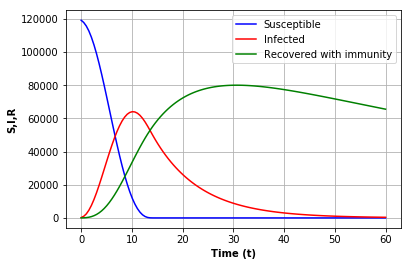

In [9]:
T = 60                                         
β, γ, λ, μ = 0.29, 1/10, 5.0, 0.01             #parameter: Contact rate, beta, and mean recovery rate, gamma, (in 1/days) same values as used for SIR model.
listu=[]
listS=[]
listI=[]
listR=[]
h = 0.5
ϕ = (np.exp(μ*h)-1)/μ
ϕ2 = (np.exp((μ+γ)*h)-1)/(μ+γ)
N = int(round(T/h))
t = np.linspace(0, T, N) 
S, u = 120000.0, np.sqrt(120000.0)      # Everyone else, S0, is susceptible to infection initially.
I, R = 20.0, 0.0                # Initial number of infected and recovered individuals, I0 and R0.

for j in range(N):
    u = (1/(2*(1+μ*ϕ)))*((-ϕ*β*np.sqrt(I)) + np.sqrt((ϕ**2)*(β**2)*I+4*(1 +μ*ϕ)*(λ*ϕ+ S)))
    S = (u)**2
    I = (1/(1 +(γ+μ)*ϕ2))*(I+β*ϕ2*(np.sqrt(I*S)))
    R = (1/(1 +μ*ϕ))*(R + (γ*ϕ)*I)
    listu.append(float(u))
    listS.append(float(S))
    listI.append(float(I))
    listR.append(float(R))
plt.plot(t, listS,'blue', t, listI, 'red', t, listR, 'g')
plt.xlabel("Time (t)", fontweight = 'bold')
plt.ylabel('S,I,R', fontweight = 'bold')
plt.grid(True)
plt.legend(['Susceptible','Infected','Recovered with immunity' ])
[min(listS), max(listS)], [min(listI), max(listI)],[min(listR), max(listR)]

([0.006363492386181078, 120000.0],
 [20.0, 64046.943738233975],
 [0.0, 80021.29456489832])

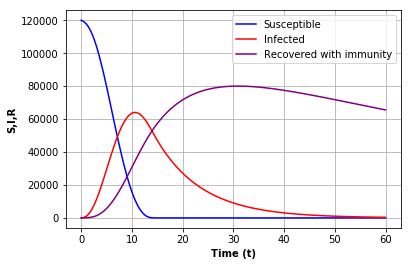

In [10]:
T = 60                                         
β, γ, λ, μ = 0.29, 1/10, 5.0, 0.01             #parameter: Contact rate, beta, and mean recovery rate, gamma, (in 1/days) same values as used for SIR model.
h = 0.5
ϕ = (np.exp(μ*h)-1)/μ
ϕ2 = (np.exp((μ+γ)*h)-1)/(μ+γ)
N = int(round(T/h))
t = np.linspace(0, T, N+1) 
u = np.zeros_like(t)        
S, I, R = np.zeros_like(t), np.zeros_like(t), np.zeros_like(t)   

S[0], u[0] = 120000.0, np.sqrt(120000.0)      # Everyone else, S0, is susceptible to infection initially.
I[0], R[0] = 20.0, 0.0                # Initial number of infected and recovered individuals, I0 and R0.

for j in range(N):
    u[j+1] = (1/(2*(1+μ*ϕ)))*((-ϕ*β*np.sqrt(I[j])) + np.sqrt((ϕ**2)*(β**2)*I[j]+4*(1 +μ*ϕ)*(λ*ϕ+ S[j])))
    S[j+1] = (u[j+1])**2
    I[j+1] = (1/(1 +(γ+μ)*ϕ2))*(I[j]+β*ϕ2*(np.sqrt(I[j]*S[j+1])))
    R[j+1] = (1/(1 +μ*ϕ))*(R[j] + (γ*ϕ)*I[j+1])
plt.plot(t, S,'blue', t, I, 'red', t, R, 'purple')
plt.xlabel("Time (t)", fontweight = 'bold')
plt.ylabel('S,I,R', fontweight = 'bold')
plt.grid(True)
plt.legend(['Susceptible','Infected','Recovered with immunity' ])
[min(S), max(S)], [min(I), max(I)],[min(R), max(R)]

<span style='color:blue'> $ \textbf{SEIR MODEL FOR COVID-19}$</span>

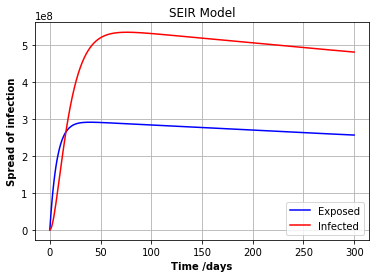

.........................................................
[475.0, 290939758.26843977] [10.0, 534007018.1701492]


In [6]:
def deriv(y, t):                # The SIR model differential equations.
    S, E , I, R, V = y
    λ = 271.23                       # influx rate
    c = 1.01*10**(-4)
    βe, βi, βv = 3.11*10**(-8), 0.62*10**(-8), 1.03*10**(-8)   # Transmission constants
    α, ω, σ, γ, μ, ξ1, ξ2 = 1/7, 0.01, 1.0, 1/15, 3.01*10**(-5), 2.30, 0  #parameters.
    β1, β2, β3 = βe/(1 + c*E), βi/(1 + c*I), βv/(1 + c*V)
    dSdt = λ - β1*E*S - β2*I*S - β3*V*S - μ*S
    dEdt = β1*E*S + β2*I*S + β3*V*S - (α + μ)*E
    dIdt = α*E - (ω + γ + μ)*I
    dRdt = γ*I - μ*R
    dVdt = ξ1*E + ξ2*I - σ*V
    return dSdt, dEdt, dIdt, dRdt, dVdt

y0 = [89985051000.0, 475.0, 10.0, 0.0, 10000.0]
t = np.linspace(0, 300, 300)     # A grid of time points (in days)# Initial conditions vector
sol = odeint(deriv, y0, t)   # Integrate the SIR equations over the time grid, t.

fig = plt.figure()
plt.plot(t, sol[:,1],'b',t, sol[:,2],'r-')    #,t, R, 'g' )   # reduced y-values into same scale: where k/(10^10)
plt.legend(['Exposed','Infected'])            #,'Recovered with immunity' ])
plt.xlabel('Time /days',fontweight = 'bold')
plt.ylabel('Spread of infection',fontweight = 'bold')
plt.grid(True)
plt.title("SEIR Model")
plt.show()
#fig.savefig('plot.png')
print('.........................................................')
print([min(sol[:,1]), max(sol[:,1])], [min(sol[:,2]), max(sol[:,2])])

<span style='color:blue'> $ \textbf{NSFD scheme for SEIR model: COVID-19}$</span>

[2746718.62012122, 290732847.2417737] [188959.32438627825, 533615093.8994099]
.........................................................


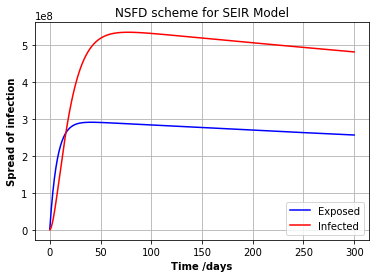

In [7]:
T = 300
λ = 271.23   # influx rate
βe, βi, βv = 3.11*10**(-8), 0.62*10**(-8),1.03*10**(-8)   # Transmission constants
α, ω, σ, γ, μ, ξ1, ξ2 = 1/7, 0.01, 1.0, 1/15, 3.01*10**(-5), 2.30, 0  #parameters.
c = 1.01*10**(-4)
listS=[]
listE=[]
listI=[]
listR=[]
listV=[]
h = 0.5
ϕ1, ϕ4 = (np.exp(μ*h)-1)/μ, (np.exp(μ*h)-1)/μ
ϕ2, ϕ3, ϕ5 = (np.exp((α+μ)*h)-1)/α+μ, (np.exp((ω+γ+μ)*h)-1)/ω+γ+μ, (np.exp(σ*h)-1)/σ
N = int(round(T/h))
t = np.linspace(0, T, N)  
S, E, I,  = 89985051000.0, 475.0, 10.0    # Everyone else, S0, is susceptible to infection initially.
R, V = 0.0, 10000.0                # Initial number of infected and recovered individuals, I0 and R0.
for j in range(N):
    β1, β2, β3 = βe/(1+c*E), βi/(1+c*I), βv/(1+c*V)
    η = β1*E + β2*I + β3*V + μ
    S = (1/(1 + η*ϕ1))*(ϕ1*λ + S)
    E = (1/(1 + ϕ1*(α+μ)))*(E + ϕ1*(η-μ)*S)
    I = (1/(1 + ϕ1*(ω + γ + μ)))*(I + ϕ1*α*E)
    R = (1/(1 + μ*ϕ1))*(R + (γ*ϕ1)*I)
    V = (1/(1 + σ))*(ϕ5*ξ1*E + ϕ5*ξ2*I + V)
    listS.append(float(S))
    listE.append(float(E))
    listI.append(float(I))
    listR.append(float(R))
    listV.append(float(V))
fig = plt.figure()
plt.plot(t, listE,'blue', t, listI, 'red')#, t, R, 'purple')
plt.xlabel("Time /days", fontweight = 'bold')
plt.ylabel('Spread of infection',fontweight = 'bold')
plt.title("NSFD scheme for SEIR Model")
plt.grid(True)
plt.legend(['Exposed','Infected','Recovered with immunity' ])
#fig.savefig('plot2.png')
print([min(listE), max(listE)], [min(listI), max(listI)])#,[min(R), max(R)]
print('.........................................................')

[475.0, 29065188.70077221] [10.0, 53347089.20987655]
.........................................................


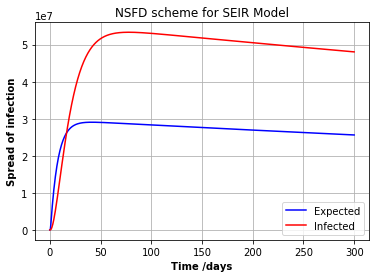

In [9]:
T = 300
λ = 271.23   # influx rate
βe, βi, βv = 3.11*10**(-8), 0.62*10**(-8),1.03*10**(-8)   # Transmission constants
α, ω, σ, γ, μ, ξ1, ξ2 = 1/7, 0.01, 1.0, 1/15, 3.01*10**(-5), 2.30, 0  #parameters.
c = 1.01*10**(-4)
steps = np.array([0.5, 1.5, 2.5, 5.0])
Values = []
n =  1
for k in range(n):
    h = steps[k]
    ϕ1, ϕ4 = (np.exp(μ*h)-1)/μ, (np.exp(μ*h)-1)/μ
    ϕ2, ϕ3, ϕ5 = (np.exp((α+μ)*h)-1)/α+μ, (np.exp((ω+γ+μ)*h)-1)/ω+γ+μ, (np.exp(σ*h)-1)/σ
    N = int(round(T/h))
    t = np.linspace(0, T, N+1) 
    u = np.zeros_like(t)        
    S, E, I, R, V = np.zeros_like(t), np.zeros_like(t), np.zeros_like(t),np.zeros_like(t),np.zeros_like(t)  
    S[0], E[0], I[0],  = 8998505100.0, 475.0, 10.0    # Everyone else, S0, is susceptible to infection initially.
    R[0], V[0] = 0.0, 1000.0                # Initial number of infected and recovered individuals, I0 and R0.
    for j in range(N):
        β1, β2, β3 = βe/(1+c*E[j]), βi/(1+c*I[j]), βv/(1+c*V[j])
        η = β1*E[j] + β2*I[j] + β3*V[j] + μ
        S[j+1] = (1/(1 + η*ϕ1))*(ϕ1*λ + S[j])
        E[j+1] = (1/(1 + ϕ1*(α+μ)))*(E[j] + ϕ1*(η-μ)*S[j+1])
        I[j+1] = (1/(1 + ϕ1*(ω + γ + μ)))*(I[j] + ϕ1*α*E[j+1])
        R[j+1] = (1/(1 + μ*ϕ1))*(R[j] + (γ*ϕ1)*I[j+1])
        V[j+1] = (1/(1 + σ))*(ϕ5*ξ1*E[j] + ϕ5*ξ2*I[j] + V[j])
        
    fig = plt.figure()
    #plt.figure(2, figsize=(15,15))
    #plt.subplot(2,2,k+1)
    plt.plot(t, E,'blue', t, I, 'red')#, t, R, 'purple')
    plt.xlabel("Time /days", fontweight = 'bold')
    plt.ylabel('Spread of infection',fontweight = 'bold')
    plt.title("NSFD scheme for SEIR Model")
    plt.grid(True)
    plt.legend(['Expected','Infected','Recovered with immunity' ])
    Values.append([u, S, I, R])
    #fig.savefig('plot2.png')
print([min(E), max(E)], [min(I), max(I)])#,[min(R), max(R)]
print('.........................................................')

<span style='color:blue'> $\textbf{2nd Paper: SEAIHR Model}$</span>

22869087.468252398
1067708.3293057622
.........................................................


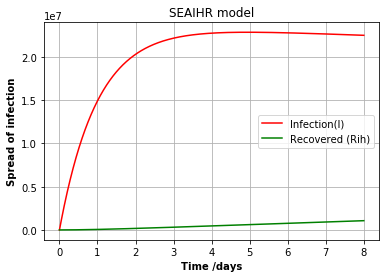

In [127]:
def deriv(y, t):
    γA, γI, γH, δI, αI, αH, σ, ρ = 1/14, 0.09/14, 0.1, 0.009/14, 0.005/14, 0.2/7, 1, 0.4  #parameters.
    λ =  2.18*10**(-6) 
    β = 0.2
    S, E, A, I, H, Ra, Rih, D = y
    dSdt = -β*(I + A)*S - λ*S
    dEdt = β*(I + A)*S + λ*S - σ*E
    dAdt = (1 - ρ)*σ*E - γA*A
    dIdt = ρ*σ*E - (δI + αI + γI)*I
    dHdt = δI*I - (αH + γH)*H
    dRadt = γA*A
    dRihdt = γI*I + γH*H
    dDdt = αI*I + αH*H
    return dSdt,dEdt,dAdt,dIdt,dHdt,dRadt,dRihdt,dDdt

y0 = 59309000, 0, 300, 150, 0, 0, 0, 0 
t = np.linspace(0, 8, 90000)
ret = odeint(deriv, y0, t)

fig = plt.figure()
#plt.figure(2, figsize=(10,5))
plt.plot(t, ret[:,3],'r', t, ret[:,6], 'g')
plt.legend(['Infection(I)', 'Recovered (Rih)'])
plt.xlabel('Time /days',fontweight = 'bold')
plt.ylabel('Spread of infection',fontweight = 'bold')
plt.grid(True)
plt.title("SEAIHR model")
fig.savefig('M1.png')
print(max(ret[:,3]))
print(max(ret[:,6]))
print('.........................................................')

<span style='color:blue'> $\textbf{2nd Paper:NSFD for SEAIHR Model}$</span>

22388212.17623499
1704103.6585419674
.........................................................


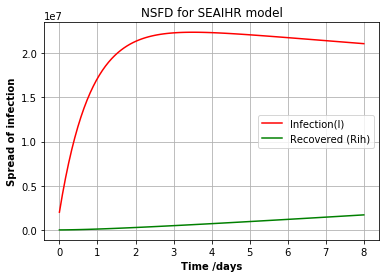

In [125]:
λ = 2.18*10**(-6)
h = 99*10**(-3)
t = np.linspace(0, 8,100)
S, E, A, I,  = 59309000, 0.0, 300.0, 150.0  # Initial 
H, Ra, Rih, D = 0.0, 0.0, 0.0, 0.0 # Initial    
β = 0.2
γA, γI, γH, δI, αI, αH, σ, ρ = 1/14, 0.09/14, 0.1, 0.09/14, 0.005/14, 0.2/7, 1, 0.4
ψ1, ψ2, ψ3, ψ4, = (np.exp(λ*h)-1)/λ , (np.exp(σ*h)-1)/σ, (np.exp(γA*h)-1)/γA, (np.exp((δI+αI+γI)*h)-1)/(δI+αI+γI)
ψ5 =  (np.exp((γH+αH)*h)-1)/(γH+αH)
valuesS = []
valuesA = []
valuesE = []
valuesI = []
valuesH = []
valuesRa = []
valuesRih = []
valuesD = []
for j in range(100):
    S = (1/(1 + ψ1*(β*(I + A) + λ )))*(S)
    E = (1/(1 + ψ2*σ))*(E + ψ2*(β*(I + A) + λ)*S)
    A = (1/(1 + ψ3*γA))*(A + (1-ρ)*ψ3*σ*E)
    I = (1/(1 + ψ4*(δI + αI + γI)))*(I + ρ*σ*ψ4*E)
    H = (1/(1 + ψ5*(αH + γH)))*(H + δI*ψ5*I)
    Ra = Ra + ψ3*(γA*A)
    Rih = Rih + ψ4*(γI*I + γH*H)
    D = D + ψ4*(αI*I  + αH*H)
    valuesS.append(S)
    valuesA.append(A)
    valuesE.append(E)
    valuesI.append(I)
    valuesH.append(H)
    valuesRa.append(Ra)
    valuesRih.append(Rih)
    valuesD.append(D)
fig = plt.figure()
#plt.figure(2, figsize =(10,5))
plt.plot(t, valuesI, 'r', t, valuesRih, 'g')
plt.legend(['Infection(I)', 'Recovered (Rih)'])
plt.xlabel('Time /days',fontweight = 'bold')
plt.ylabel('Spread of infection',fontweight = 'bold')
plt.title("NSFD for SEAIHR model")
plt.grid(True)
#fig.savefig('M2.png')
print(max(valuesI))
print(max(valuesRih))
print('.........................................................')

4680.00309802833
15.932408264965275
282.40935775526674


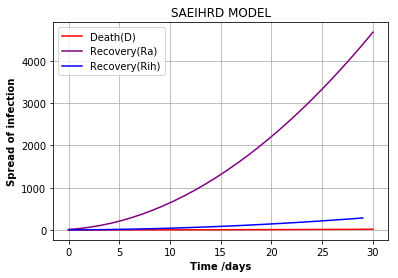

In [106]:
γA, γI, γH, δI, αI, αH, σ, ρ = 1/14, 0.09/14, 0.1, 0.09/14, 0.005/14, 0.2/7, 1.0, 0.4  #parameters.
β = 0.4
S, E, A, I, H, Ra, Rih, D = 59309000, 0, 300, 150, 0, 0, 0, 0 
t = np.linspace(0, 30, 30)
λ = 2.18*10**(-6)
valuesS = []
valuesA = []
valuesE = []
valuesI = []
valuesH = []
valuesRa = []
valuesRih = []
h = 0.0035
valuesD = []
for i in range(30):
    S = S*np.exp(-(β*(I+A)-λ)*h)
    E = (1/σ)*(β*(I+A)*S+λ*S - (β*(I+A)*S+λ*S-σ*E)*np.exp(-σ*h))
    A = (1/γA)*((1 - ρ)*σ*E - ((1 - ρ)*σ*E - γA*A)*np.exp(-γA*h))
    I = (1/(δI+αI+γI))*(ρ*σ*E - (ρ*σ*E-(δI+αI+γI)*I)*np.exp(-(δI+αI+γI)*h))
    H = (1/(αH + γH))*(δI*I - (δI*I -(αH + γH)*H)*np.exp(-(αH + γH)*h))
    Ra = Ra +γA*A*h
    Rih = Rih + (γI*I +γH*H)*h
    D = D + (αI*I+αH*H)*h
    valuesS.append(S)
    valuesA.append(A)
    valuesE.append(E)
    valuesI.append(I)
    valuesH.append(H)
    valuesRa.append(Ra)
    valuesRih.append(Rih)
    valuesD.append(D)
fig = plt.figure()
#plt.figure(2, figsize=(10,5))
plt.plot(t, valuesD,'r',t, valuesRa,'purple',valuesRih,'b')
plt.legend(['Death(D)', 'Recovery(Ra)','Recovery(Rih)'])
plt.xlabel('Time /days',fontweight = 'bold')
plt.ylabel('Spread of infection',fontweight = 'bold')
plt.grid(True)
plt.title("SAEIHRD MODEL")
#fig.savefig('M11.png')
print(max(valuesRa))
print(max(valuesD))
print(max(valuesRih))

4348.226785007302
14.663880307827071
261.7025172898793


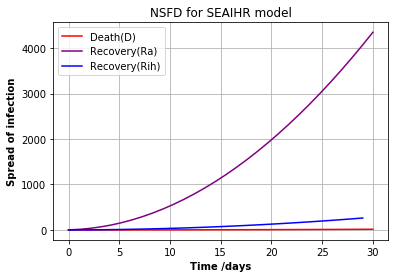

In [107]:
λ = 2.18*10**(-6) 
β = 0.2                       
γA, γI, γH, δI, αI, αH, σ,  ρ = 1/14, 0.09/14, 0.1, 0.09/14, 0.005/14, 0.2/7, 1, 0.4 #parameters.
h = 2*10**(-3)
ψ1, ψ2, ψ3, ψ4, = (np.exp(λ*h)-1)/λ , (np.exp(σ*h)-1)/σ, (np.exp(γA*h)-1)/γA, (np.exp((δI+αI+γI)*h)-1)/(δI+αI+γI)
ψ5 =  (np.exp((γH+αH)*h)-1)/(γH+αH)
t = np.linspace(0, 30, 30)
S, E,A, I  = 59309000, 0.0, 300.0, 150.0
H, Ra, Rih, D = 0.0, 0.0, 0.0, 0.0 

valuesS = []
valuesA = []
valuesE = []
valuesI = []
valuesH = []
valuesRa = []
valuesRih = []
valuesD = []
for j in range(30):
    S = (1/(1 + ψ1*(β*(I + A) + λ )))*(S)
    E = (1/(1 + ψ2*σ))*(E + ψ2*(β*(I + A) + λ)*S)
    A = (1/(1 + ψ3*γA))*(A + (1-ρ)*ψ3*σ*E)
    I = (1/(1 + ψ4*(δI + αI + γI)))*(I + ρ*σ*ψ4*E)
    H = (1/(1 + ψ5*(αH + γH)))*(H + δI*ψ5*I)
    Ra = Ra + ψ3*(γA*A)
    Rih = Rih + ψ4*(γI*I + γH*H)
    D = D + ψ4*(αI*I  + αH*H)
    valuesS.append(S)
    valuesA.append(A)
    valuesE.append(E)
    valuesI.append(I)
    valuesH.append(H)
    valuesRa.append(Ra)
    valuesRih.append(Rih)
    valuesD.append(D)
fig = plt.figure()
plt.plot(t, valuesD,'r',t, valuesRa,'purple',valuesRih,'b')
plt.legend(['Death(D)', 'Recovery(Ra)','Recovery(Rih)'])
plt.xlabel('Time /days',fontweight = 'bold')
plt.ylabel('Spread of infection',fontweight = 'bold')
plt.title("NSFD for SEAIHR model")
plt.grid(True)
#fig.savefig('M22.png')
print(max(valuesRa))
print(max(valuesD))
print(max(valuesRih))